#### visualize audio data from dataset
- take a look at individual segmented elements

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd
import IPython

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [11]:
from avgn.signalprocessing.create_spectrogram_dataset import create_syllable_df, get_element
from avgn.signalprocessing.create_spectrogram_dataset import make_spec
from avgn.visualization.spectrogram import visualize_spec

In [5]:
from avgn.visualization.projections import scatter_projections
from avgn.visualization.quickplots import draw_projection_plots

### Collect data

In [6]:
hparams = HParams(
    num_mel_bins = 64,
    butter_lowcut = 20000,
    butter_highcut = 160000,
    mel_lower_edge_hertz = 40000,
    mel_upper_edge_hertz = 160000,
    win_length_ms = .5,
    hop_length_ms = .1,
    n_fft = 1024,
    ref_level_db = 20,
    min_level_db = -50
    )

In [7]:
DATASET_ID = 'tachibana_mouse'#'tachibana_gerbil'
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

### get a syllable from the dataset

In [8]:
datafile = list(dataset.data_files.values())[0]
element = "syllables"
element_number = 25
indv = None

In [9]:
rate, syll = get_element(datafile, indv, element_number, element, dataset.hparams)

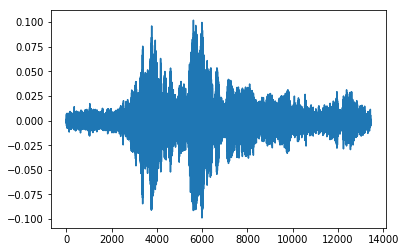

In [10]:
plt.plot(syll)
IPython.display.Audio(data=syll, rate=int(rate/10))

### view spectrogram of syllable

In [12]:
# make a spectrogram
spec = make_spec(
        syll,
        rate,
        hparams=hparams,
        mel_matrix=dataset.mel_matrix,
        use_mel=True,
        use_tensorflow=False,
    
    )
np.shape(spec)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(64, 337)

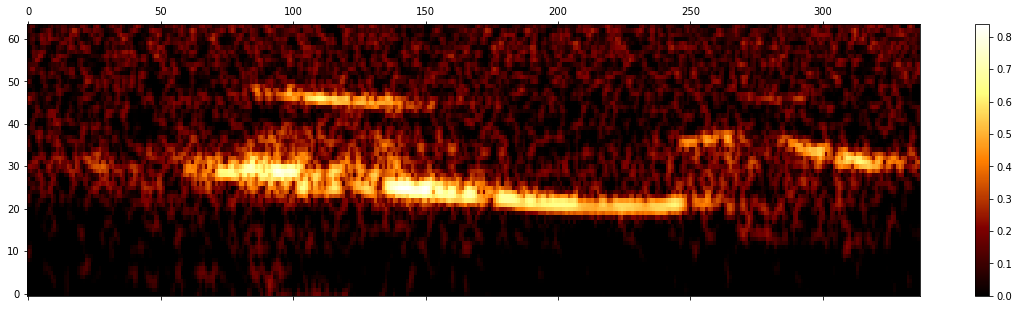

In [13]:
visualize_spec(spec)

In [ ]:
### view a set of spectrograms